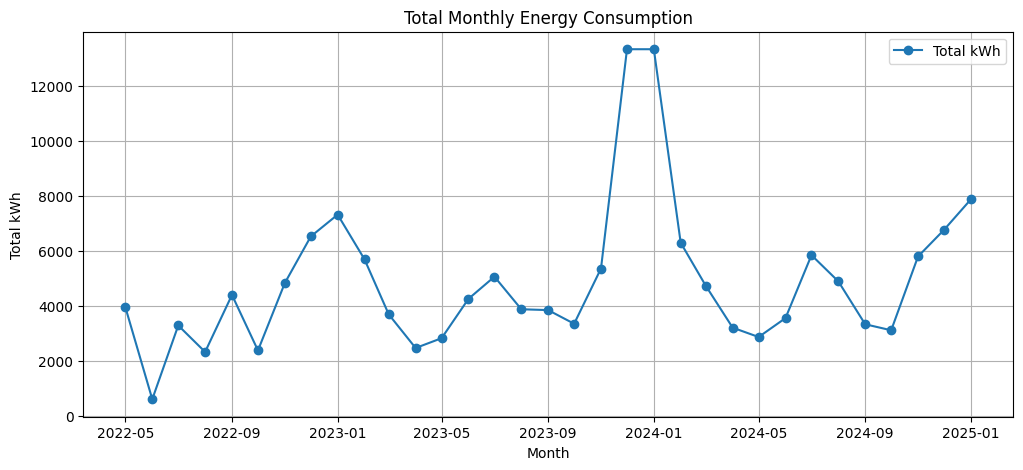

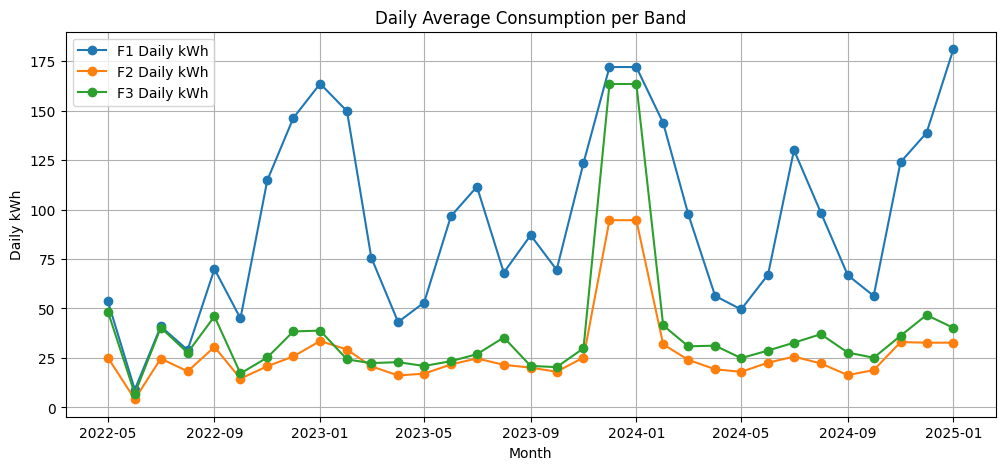

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/fasce_monthly_IT012E00314466.csv', parse_dates=['date'])

# Plot total monthly consumption
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['total_kWh'], marker='o', label='Total kWh')
plt.title('Total Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Total kWh')
plt.grid(True)
plt.legend()
plt.show()

# Plot daily average consumption per band
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['F1_daily_kWh'], marker='o', label='F1 Daily kWh')
plt.plot(df['date'], df['F2_daily_kWh'], marker='o', label='F2 Daily kWh')
plt.plot(df['date'], df['F3_daily_kWh'], marker='o', label='F3 Daily kWh')
plt.title('Daily Average Consumption per Band')
plt.xlabel('Month')
plt.ylabel('Daily kWh')
plt.grid(True)
plt.legend()
plt.show()

### Cooling Degree Days 

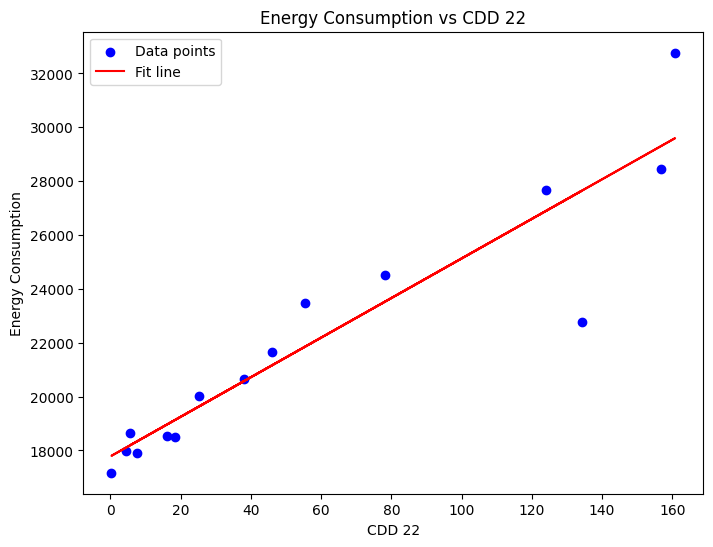

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CDD data
cdd = pd.read_csv('data/LIML_CDD_22C+-3C.csv', skiprows=6)
cdd['Month starting'] = pd.to_datetime(cdd['Month starting'])
# Choose CDD for base temperature 22
cdd = cdd[['Month starting', 'CDD 22']]

# Load energy consumption data
energy = pd.read_csv('data/fasce_monthly_IT012E00314418.csv')
energy['date'] = pd.to_datetime(energy['date'])
# Adjust column names as needed
# energy = energy[['Month', 'Energy_Consumption']]

# Merge on month
df = pd.merge(cdd, energy, left_on='Month starting', right_on='date')

# Excluir fechas donde CDD 22 sea 0
df = df[df['CDD 22'] != 0]

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['CDD 22'], df['total_kWh'], color='blue', label='Data points')
# Fit and plot regression line
m, b = np.polyfit(df['CDD 22'], df['total_kWh'], 1)
plt.plot(df['CDD 22'], m*df['CDD 22'] + b, color='red', label='Fit line')
plt.xlabel('CDD 22')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs CDD 22')
plt.legend()
plt.show()

Months where CDD 22 is 0:
   Month starting  CDD 22
2      2022-11-01     0.0
3      2022-12-01     0.0
4      2023-01-01     0.0
5      2023-02-01     0.0
6      2023-03-01     0.0
14     2023-11-01     0.0
15     2023-12-01     0.0
16     2024-01-01     0.0
17     2024-02-01     0.0
18     2024-03-01     0.0
25     2024-10-01     0.0
26     2024-11-01     0.0
27     2024-12-01     0.0
28     2025-01-01     0.0
29     2025-02-01     0.0
30     2025-03-01     0.0


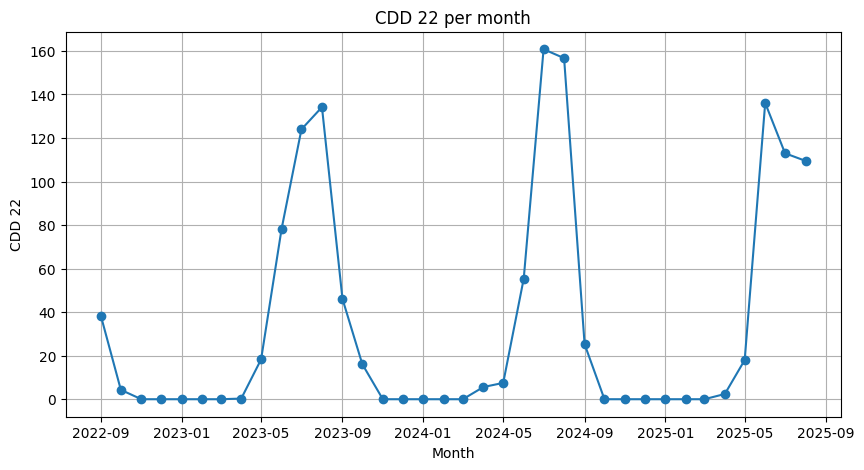

In [9]:
# Show months where CDD 22 is 0
df_cdd = cdd.copy()
months_cdd_zero = df_cdd[df_cdd['CDD 22'] == 0]
print('Months where CDD 22 is 0:')
print(months_cdd_zero[['Month starting', 'CDD 22']])

# Plot all CDD 22 values over time
plt.figure(figsize=(10,5))
plt.plot(df_cdd['Month starting'], df_cdd['CDD 22'], marker='o')
plt.title('CDD 22 per month')
plt.xlabel('Month')
plt.ylabel('CDD 22')
plt.grid(True)
plt.show()

In [17]:
# Calculate and display correlation metrics between HDD 15.5 and energy consumption
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['CDD 22'], df['total_kWh'])
print(f'Pearson correlation coefficient: {corr:.3f}')
print(f'P-value: {p_value:.3e}')

Pearson correlation coefficient: 0.929
P-value: 5.691e-07


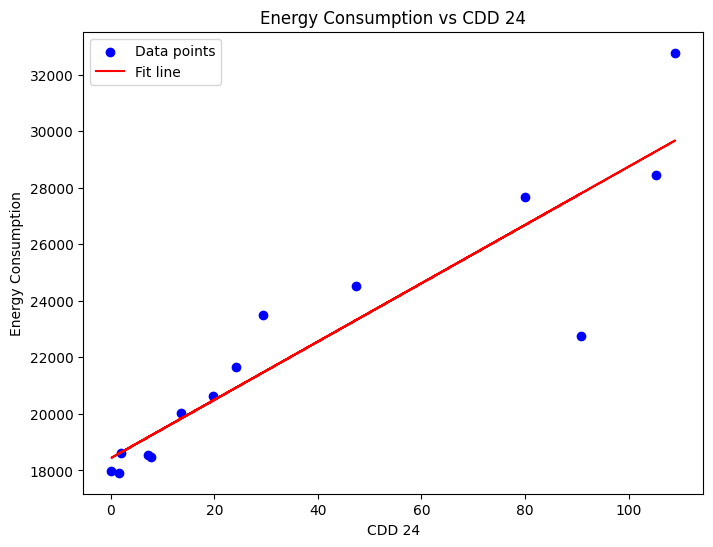

Pearson correlation coefficient: 0.914
P-value: 4.748e-06


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CDD data
cdd = pd.read_csv('data/LIML_CDD_24C.csv', skiprows=6)
cdd['Month starting'] = pd.to_datetime(cdd['Month starting'])
# Choose CDD for base temperature 24
cdd = cdd[['Month starting', 'CDD 24']]

# Load energy consumption data
energy = pd.read_csv('data/fasce_monthly_IT012E00314418_full.csv')
energy['date'] = pd.to_datetime(energy['date'])
# Adjust column names as needed
# energy = energy[['Month', 'Energy_Consumption']]

# Merge on month
df = pd.merge(cdd, energy, left_on='Month starting', right_on='date')

# Excluir fechas donde CDD 24 sea 0
df = df[df['CDD 24'] != 0]

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['CDD 24'], df['total_kWh'], color='blue', label='Data points')
# Fit and plot regression line
m, b = np.polyfit(df['CDD 24'], df['total_kWh'], 1)
plt.plot(df['CDD 24'], m*df['CDD 24'] + b, color='red', label='Fit line')
plt.xlabel('CDD 24')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs CDD 24')
plt.legend()
plt.show()
# Calculate and display correlation metrics between HDD 15.5 and energy consumption
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['CDD 24'], df['total_kWh'])
print(f'Pearson correlation coefficient: {corr:.3f}')
print(f'P-value: {p_value:.3e}')

### Heating Degree Days

Months where HDD 15.5 is 0:
   Month starting  HDD 15.5
9      2023-06-01       0.0
10     2023-07-01       0.0
11     2023-08-01       0.0
22     2024-07-01       0.0
23     2024-08-01       0.0
33     2025-06-01       0.0


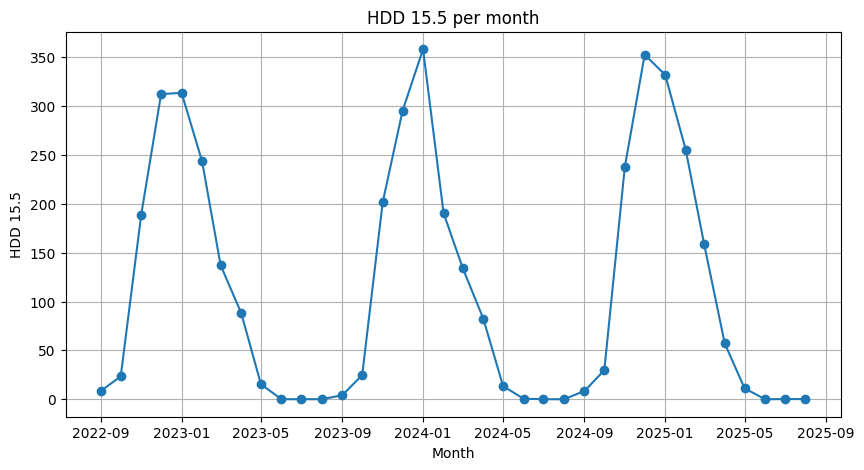

In [12]:
# Analyze HDD (Heating Degree Days)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load HDD data
hdd = pd.read_csv('data/LIML_HDD_15.5C+-3C.csv', skiprows=6)
hdd['Month starting'] = pd.to_datetime(hdd['Month starting'])
# Select HDD for base temperature 15.5
hdd = hdd[['Month starting', 'HDD 15.5']]

# Show months where HDD 15.5 is 0
months_hdd_zero = hdd[hdd['HDD 15.5'] == 0]
print('Months where HDD 15.5 is 0:')
print(months_hdd_zero[['Month starting', 'HDD 15.5']])

# Plot all HDD 15.5 values over time
plt.figure(figsize=(10,5))
plt.plot(hdd['Month starting'], hdd['HDD 15.5'], marker='o')
plt.title('HDD 15.5 per month')
plt.xlabel('Month')
plt.ylabel('HDD 15.5')
plt.grid(True)
plt.show()


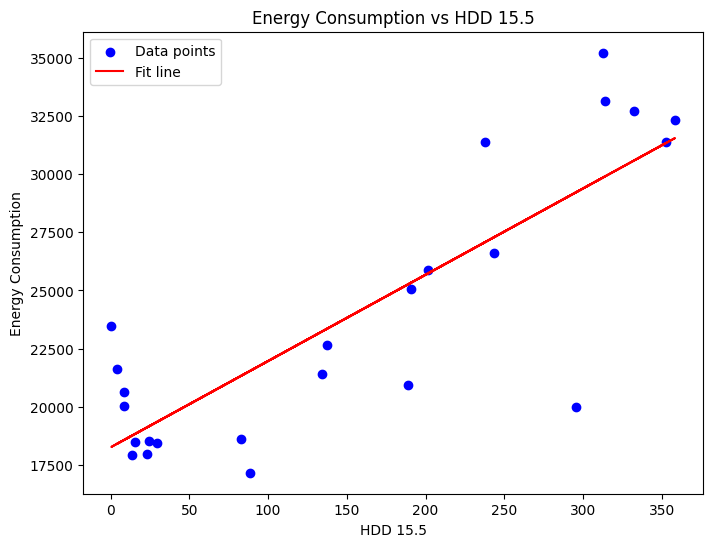

In [13]:
# Load energy consumption data
energy = pd.read_csv('data/fasce_monthly_IT012E00314418.csv')
energy['date'] = pd.to_datetime(energy['date'])

# Merge on month
df_hdd = pd.merge(hdd, energy, left_on='Month starting', right_on='date')

# Exclude months where HDD 15.5 is 0
df_hdd = df_hdd[df_hdd['HDD 15.5'] != 0]

# Scatter plot: HDD 15.5 vs Energy Consumption
plt.figure(figsize=(8,6))
plt.scatter(df_hdd['HDD 15.5'], df_hdd['total_kWh'], color='blue', label='Data points')
# Fit and plot regression line
m, b = np.polyfit(df_hdd['HDD 15.5'], df_hdd['total_kWh'], 1)
plt.plot(df_hdd['HDD 15.5'], m*df_hdd['HDD 15.5'] + b, color='red', label='Fit line')
plt.xlabel('HDD 15.5')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs HDD 15.5')
plt.legend()
plt.show()

In [16]:
# Calculate and display correlation metrics between HDD 15.5 and energy consumption
corr, p_value = pearsonr(df_hdd['HDD 15.5'], df_hdd['total_kWh'])
print(f'Pearson correlation coefficient: {corr:.3f}')
print(f'P-value: {p_value:.3e}')

Pearson correlation coefficient: 0.828
P-value: 5.791e-07


### CDD and HDD comparison

In [20]:
import pandas as pd

# Load monthly results from regression CSV (skip header rows to get to monthly data)
reg_monthly = pd.read_csv('data/Regressions_LIML_2023-01-01_to_2024-12-31_met18.csv', skiprows=16)
reg_monthly.columns = reg_monthly.columns.str.strip()

# Extract the months and HDD 15.5 C from regression CSV (column may be named slightly differently, check for 'HDD 15.5 C')
if 'HDD 15.5 C' in reg_monthly.columns:
    reg_hdd = reg_monthly[['First day', 'HDD 15.5 C']].copy()
else:
    reg_hdd = reg_monthly[['First day']].copy()
    reg_hdd['HDD 15.5 C'] = None  # If not present, fill with None

# Load raw HDD data
hdd = pd.read_csv('data/LIML_HDD_15.5C+-3C.csv', skiprows=6)
hdd['Month starting'] = pd.to_datetime(hdd['Month starting'])

# Prepare a DataFrame for the period 2023-01-01 to 2024-12-31
hdd_period = hdd[(hdd['Month starting'] >= '2023-01-01') & (hdd['Month starting'] <= '2024-12-31')]
hdd_period = hdd_period[['Month starting', 'HDD 15.5']].copy()

# Merge on month for detailed comparison
reg_hdd['First day'] = pd.to_datetime(reg_hdd['First day'], errors='coerce')
comparison = pd.merge(reg_hdd, hdd_period, left_on='First day', right_on='Month starting', how='outer')

print(comparison)

    First day  HDD 15.5 C Month starting  HDD 15.5
0  2023-01-01       313.7     2023-01-01     313.7
1  2023-02-01       243.5     2023-02-01     243.5
2  2023-03-01       137.1     2023-03-01     137.1
3  2023-04-01        88.4     2023-04-01      88.4
4  2023-05-01        15.3     2023-05-01      15.3
5  2023-06-01         0.0     2023-06-01       0.0
6  2023-07-01         0.0     2023-07-01       0.0
7  2023-08-01         0.0     2023-08-01       0.0
8  2023-09-01         4.1     2023-09-01       4.1
9  2023-10-01        24.7     2023-10-01      24.7
10 2023-11-01       201.6     2023-11-01     201.6
11 2023-12-01       295.2     2023-12-01     295.2
12 2024-01-01       358.3     2024-01-01     358.3
13 2024-02-01       190.6     2024-02-01     190.6
14 2024-03-01       134.2     2024-03-01     134.2
15 2024-04-01        82.6     2024-04-01      82.6
16 2024-05-01        13.4     2024-05-01      13.4
17 2024-06-01         0.5     2024-06-01       0.5
18 2024-07-01         0.0     2

In [21]:
import pandas as pd

# Load monthly results from regression CSV (skip header rows to get to monthly data)
reg_monthly = pd.read_csv('data/Regressions_LIML_2023-01-01_to_2024-12-31_met18.csv', skiprows=16)
reg_monthly.columns = reg_monthly.columns.str.strip()

# Extract the months and CDD 22 C from regression CSV (column may be named slightly differently, check for 'CDD 22 C')
if 'CDD 22 C' in reg_monthly.columns:
    reg_cdd = reg_monthly[['First day', 'CDD 22 C']].copy()
else:
    reg_cdd = reg_monthly[['First day']].copy()
    reg_cdd['CDD 22 C'] = None  # If not present, fill with None

# Load raw CDD data
cdd = pd.read_csv('data/LIML_CDD_22C+-3C.csv', skiprows=6)
cdd['Month starting'] = pd.to_datetime(cdd['Month starting'])

# Prepare a DataFrame for the period 2023-01-01 to 2024-12-31
cdd_period = cdd[(cdd['Month starting'] >= '2023-01-01') & (cdd['Month starting'] <= '2024-12-31')]
cdd_period = cdd_period[['Month starting', 'CDD 22']].copy()

# Merge on month for detailed comparison
reg_cdd['First day'] = pd.to_datetime(reg_cdd['First day'], errors='coerce')
comparison_cdd = pd.merge(reg_cdd, cdd_period, left_on='First day', right_on='Month starting', how='outer')

print(comparison_cdd)

    First day  CDD 22 C Month starting  CDD 22
0  2023-01-01       0.0     2023-01-01     0.0
1  2023-02-01       0.0     2023-02-01     0.0
2  2023-03-01       0.0     2023-03-01     0.0
3  2023-04-01       0.3     2023-04-01     0.3
4  2023-05-01      18.3     2023-05-01    18.3
5  2023-06-01      78.3     2023-06-01    78.3
6  2023-07-01     124.0     2023-07-01   124.0
7  2023-08-01     134.2     2023-08-01   134.2
8  2023-09-01      46.1     2023-09-01    46.1
9  2023-10-01      16.1     2023-10-01    16.1
10 2023-11-01       0.0     2023-11-01     0.0
11 2023-12-01       0.0     2023-12-01     0.0
12 2024-01-01       0.0     2024-01-01     0.0
13 2024-02-01       0.0     2024-02-01     0.0
14 2024-03-01       0.0     2024-03-01     0.0
15 2024-04-01       5.6     2024-04-01     5.6
16 2024-05-01       7.5     2024-05-01     7.5
17 2024-06-01      55.4     2024-06-01    55.4
18 2024-07-01     160.8     2024-07-01   160.8
19 2024-08-01     156.7     2024-08-01   156.7
20 2024-09-01

In [4]:
import pandas as pd
from IPython.display import display

# Load the comparative table
df = pd.read_csv('data/Comparative_Table_with_Equation_2.csv')

# Display as a styled table
styled = df.style.set_caption('Comparison of Regression Metrics').format(precision=4).set_table_styles([{'selector': 'caption','props': [('caption-side', 'top')]}])
display(styled)

,Metric,Local (regression_summary.csv),Degree Days (Equation 2)
0,R2,0.9872,0.7078
1,R2 adjusted,0.9854,0.6799
2,CVRMSE,12.3491,0.1226
3,Baseload (b),548.8889,549.3553
4,HDD coef (h),40.9561,41.1509
5,CDD coef (c),80.5190,80.6408


## Pizzium

In [ ]:
import pandas as pd
import numpy as np

path = "data/Pizzium - Via Buonarroti Milano_electricity_D.csv" 
df = pd.read_csv(path)

df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
date_col = "utc_time"  # auto-detected
energy_col = "it012e00135714"  # auto-detected total kWh column

# --- parse dates and add year/month ---
df["date"] = pd.to_datetime(df[date_col], errors="coerce", utc=True).dt.tz_convert(None)
df = df.dropna(subset=["date"]).copy()
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

# --- slice Augusts ---
aug24 = df[(df["year"] == 2024) & (df["month"] == 8)]
aug25 = df[(df["year"] == 2025) & (df["month"] == 8)]

tot24 = aug24[energy_col].sum()
tot25 = aug25[energy_col].sum()
days24 = aug24["date"].dt.normalize().nunique()
days25 = aug25["date"].dt.normalize().nunique()

avg24 = tot24 / days24 if days24 else np.nan
avg25 = tot25 / days25 if days25 else np.nan

abs_savings_kwh = tot24 - tot25                 # positive = reduction
pct_savings = (abs_savings_kwh / tot24) * 100   # % vs Aug 2024

print(f"Aug 2024 total: {tot24:,.0f} kWh")
print(f"Aug 2025 total: {tot25:,.0f} kWh")
print(f"Savings: {abs_savings_kwh:,.0f} kWh  ({pct_savings:.2f}%)")
print(f"Avg daily: {avg24:,.0f} → {avg25:,.0f} kWh/day")


Aug 2024 total: 11,698,698 kWh
Aug 2025 total: 9,494,733 kWh
Savings: 2,203,965 kWh  (18.84%)
Avg daily: 377,377 → 306,282 kWh/day


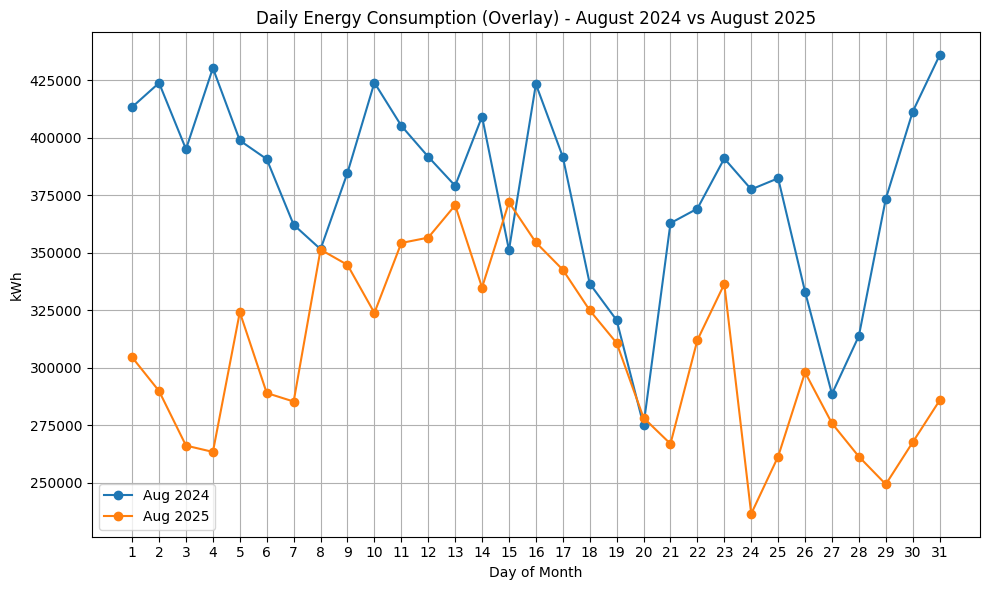

In [15]:
import matplotlib.pyplot as plt

# Ensure we have a "day of month" column
aug24 = aug24.copy()
aug25 = aug25.copy()
aug24["day"] = aug24["date"].dt.day
aug25["day"] = aug25["date"].dt.day

plt.figure(figsize=(10,6))
plt.plot(aug24["day"], aug24[energy_col], marker='o', label="Aug 2024")
plt.plot(aug25["day"], aug25[energy_col], marker='o', label="Aug 2025")

plt.title("Daily Energy Consumption (Overlay) - August 2024 vs August 2025")
plt.xlabel("Day of Month")
plt.ylabel("kWh")
plt.xticks(range(1, 32))  # 1–31
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import numpy as np

start_date = pd.Timestamp("2025-08-05")
window_days = 26

# --- Define windows ---
curr = df[(df["date"] >= start_date) & 
          (df["date"] < start_date + pd.Timedelta(days=window_days))].copy()
prev = df[(df["date"] >= start_date - pd.Timedelta(days=window_days)) & 
          (df["date"] < start_date)].copy()

# --- Totals ---
tot_curr = curr[energy_col].sum()
tot_prev = prev[energy_col].sum()

# --- Days (unique dates) ---
days_curr = curr["date"].dt.normalize().nunique()
days_prev = prev["date"].dt.normalize().nunique()

# --- Daily averages ---
avg_curr = tot_curr / days_curr if days_curr else np.nan
avg_prev = tot_prev / days_prev if days_prev else np.nan

# --- Changes ---
abs_change = tot_prev - tot_curr
pct_change = (abs_change / tot_prev * 100) if tot_prev else np.nan

# --- Summary table ---
summary_window = pd.DataFrame([
    {"Metric": "Total kWh", "Prev 26d": tot_prev, "5–30 Aug": tot_curr,
     "Change (kWh)": abs_change, "Change (%)": pct_change},
    {"Metric": "Avg daily kWh", "Prev 26d": avg_prev, "5–30 Aug": avg_curr,
     "Change (kWh)": avg_prev - avg_curr if np.all(pd.notna([avg_prev, avg_curr])) else np.nan,
     "Change (%)": ((avg_prev - avg_curr) / avg_prev * 100) if avg_prev else np.nan}
])

print(summary_window)


          Metric      Prev 26d      5–30 Aug   Change (kWh)  Change (%)
0      Total kWh  7.660309e+06  8.084660e+06 -424351.000000   -5.539607
1  Avg daily kWh  2.946273e+05  3.109485e+05  -16321.192308   -5.539607


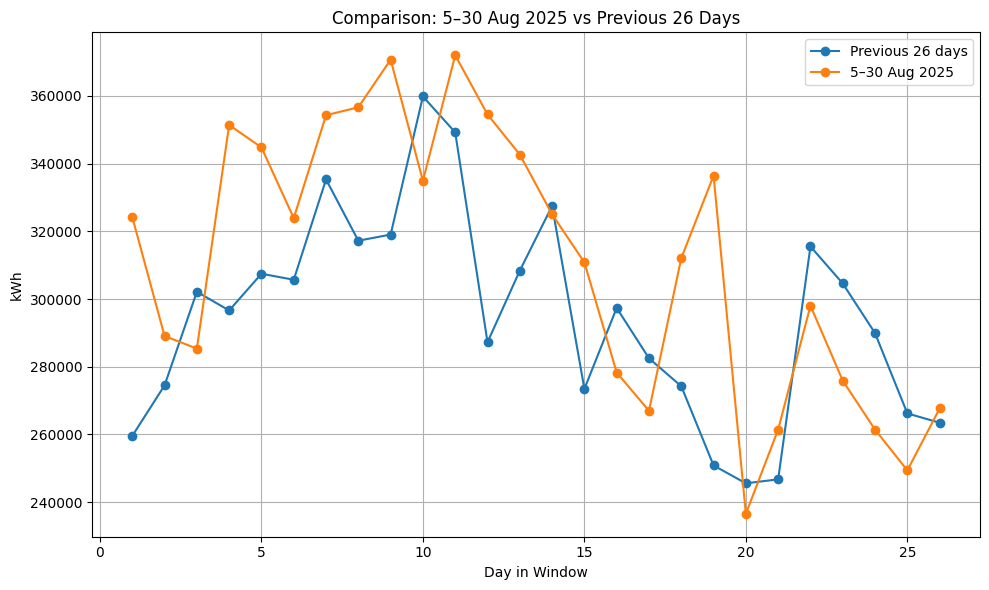

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# pick start date and window
start_date = pd.Timestamp("2025-08-05")
window_days = 26

# slice current window (5–30 Aug 2025)
curr = df[(df["date"] >= start_date) & 
          (df["date"] < start_date + pd.Timedelta(days=window_days))].copy()

# slice previous window (10 Jul – 4 Aug 2025)
prev = df[(df["date"] >= start_date - pd.Timedelta(days=window_days)) & 
          (df["date"] < start_date)].copy()

# align them by artificial "day index" 1…26
curr["day_index"] = range(1, len(curr)+1)
prev["day_index"] = range(1, len(prev)+1)

plt.figure(figsize=(10,6))
plt.plot(prev["day_index"], prev[energy_col], marker='o', label="Previous 26 days")
plt.plot(curr["day_index"], curr[energy_col], marker='o', label="5–30 Aug 2025")

plt.title("Comparison: 5–30 Aug 2025 vs Previous 26 Days")
plt.xlabel("Day in Window")
plt.ylabel("kWh")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
